<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Trabajo Práctico de Laboratorio 1

#### Por Grupo 2


# Consigna

![Consigna](Consigna.png "Consigna")

# Desarrollo

Para el diseño del circuito, se desarrolló un filtro Notch mediante la suma de un filtro pasabajos y uno pasaaltos. El UAF42 presenta salidas HP y LP, como así también un amplificador operacional extra que puede utilizarse como sumador. Para el diseño de los componentes, se tomaron las ecuaciones dadas por la datasheet.

![Ecuaciones_Datasheet](Desarrollo/Ecuaciones_Datasheet.png "Ecuaciones_Datasheet")

![1](Desarrollo/1.jpg "1")

![2](Desarrollo/2.jpg "2")

![3](Desarrollo/3.jpg "3")

# Simulación

In [1]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

# un módulo adaptado a mis necesidades
from splane import analyze_sys, pretty_print_bicuad_omegayq

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

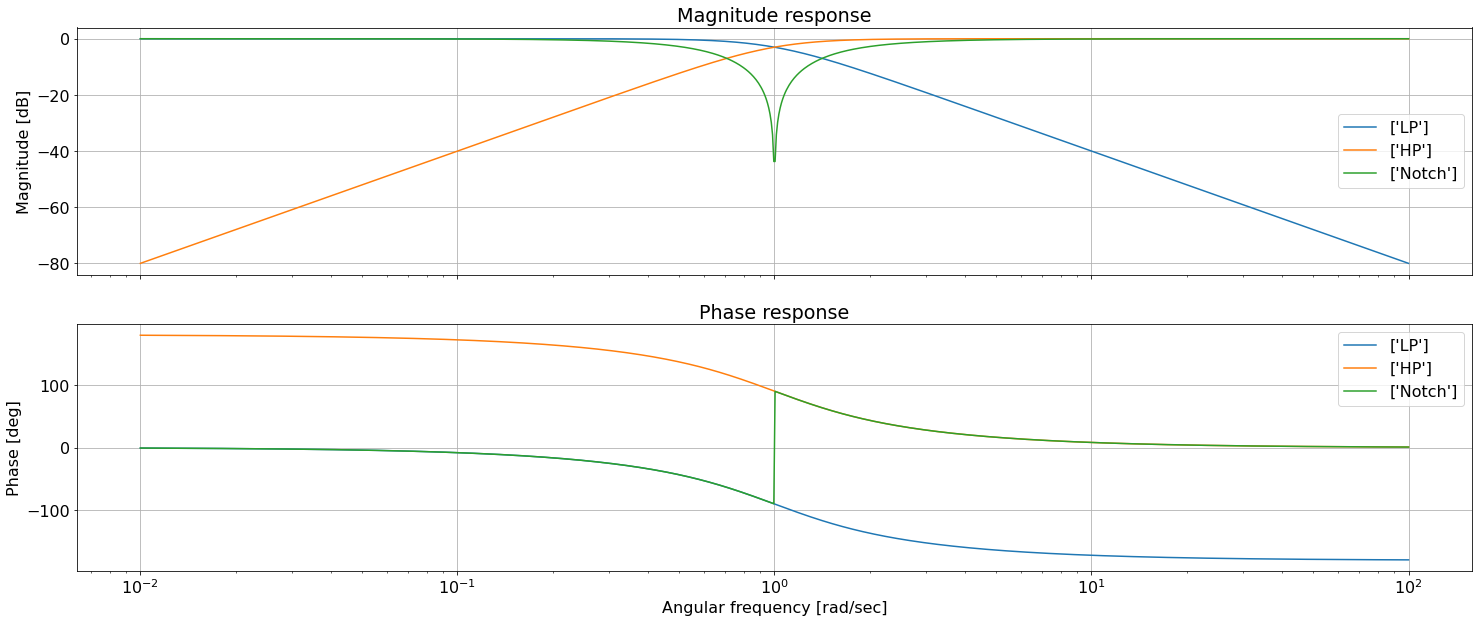

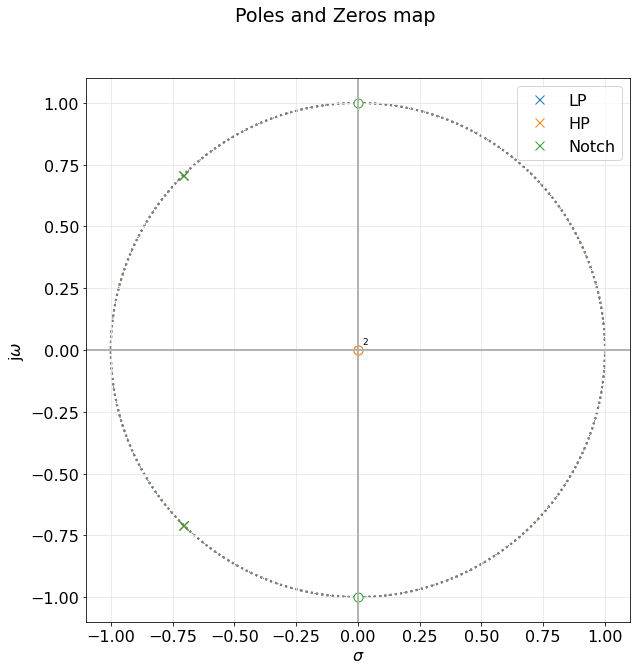

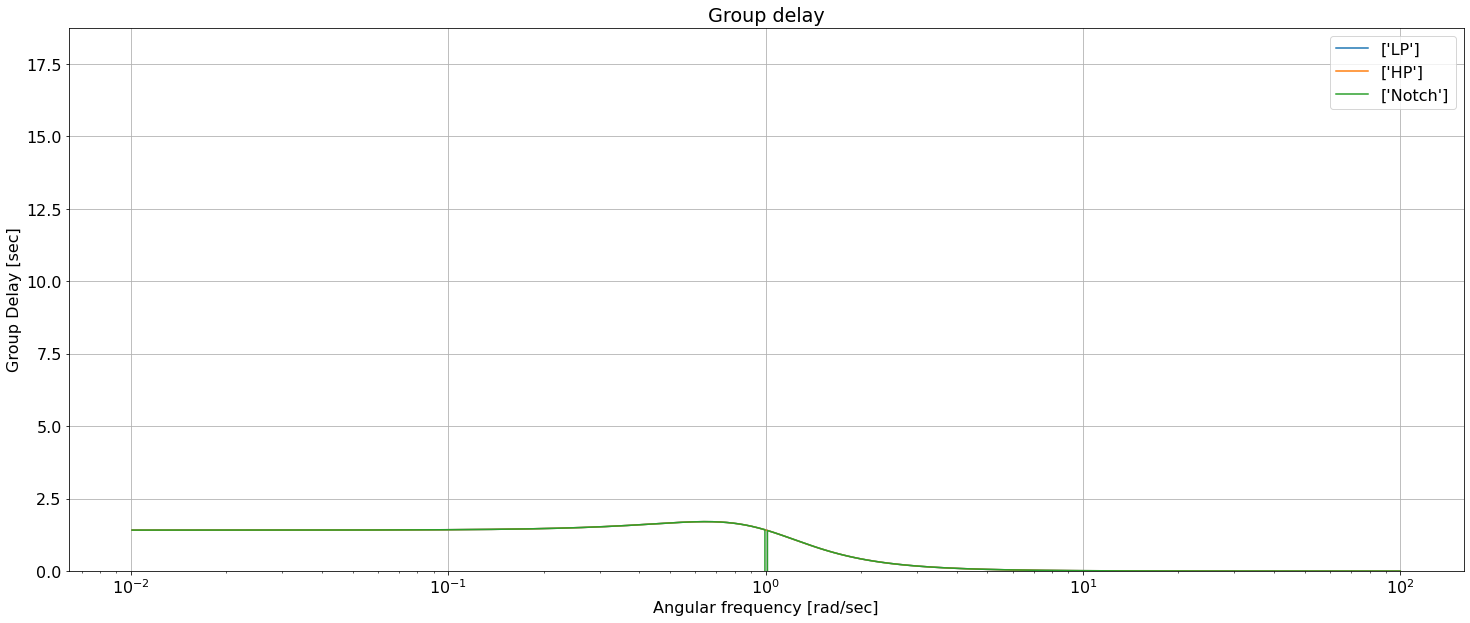

In [5]:
# Numeradores para cada filtro
num1 = np.array([1])
num2 = np.array([1, 0, 0])
num3 = np.array([1, 0, 1])

# Mismo denominador para todos los filtros
den = np.array([1, np.sqrt(2), 1])

sos_1 = sig.TransferFunction(num1, den) # Filtro pasabajos
sos_2 = sig.TransferFunction(num2, den) # Filtro pasaaltos
sos_3 = sig.TransferFunction(num3, den) # Filtro Notch

all_sos = [sos_1, sos_2, sos_3]

pretty_print_bicuad_omegayq(num1,den)
pretty_print_bicuad_omegayq(num2,den)
pretty_print_bicuad_omegayq(num3,den)

plt.close('all')
analyze_sys(all_sos, sys_name=['LP', 'HP', 'Notch'])

# SPICE

![Circuito](Simulaciones/Circuito.png "Circuito")

![Atenuacion_50Hz](Simulaciones/Atenuacion_50Hz.png "Atenuacion_50Hz")

# Mediciones

![Setup](Mediciones/Setup.jpg "Setup")

Por problemas en el armado de la placa que no pudimos detectar, tuvimos que montar el circuito en un protoboard. Esto nos demoró durante la medición, pero luego pudimos medir correctamente y obtuvimos lo siguiente.

Atenuación en 50Hz: %d dB -74.59402897268383
Desfasaje en 47Hz: -1.476548547 rad
Desfasaje en 55Hz: 1.445132621 rad


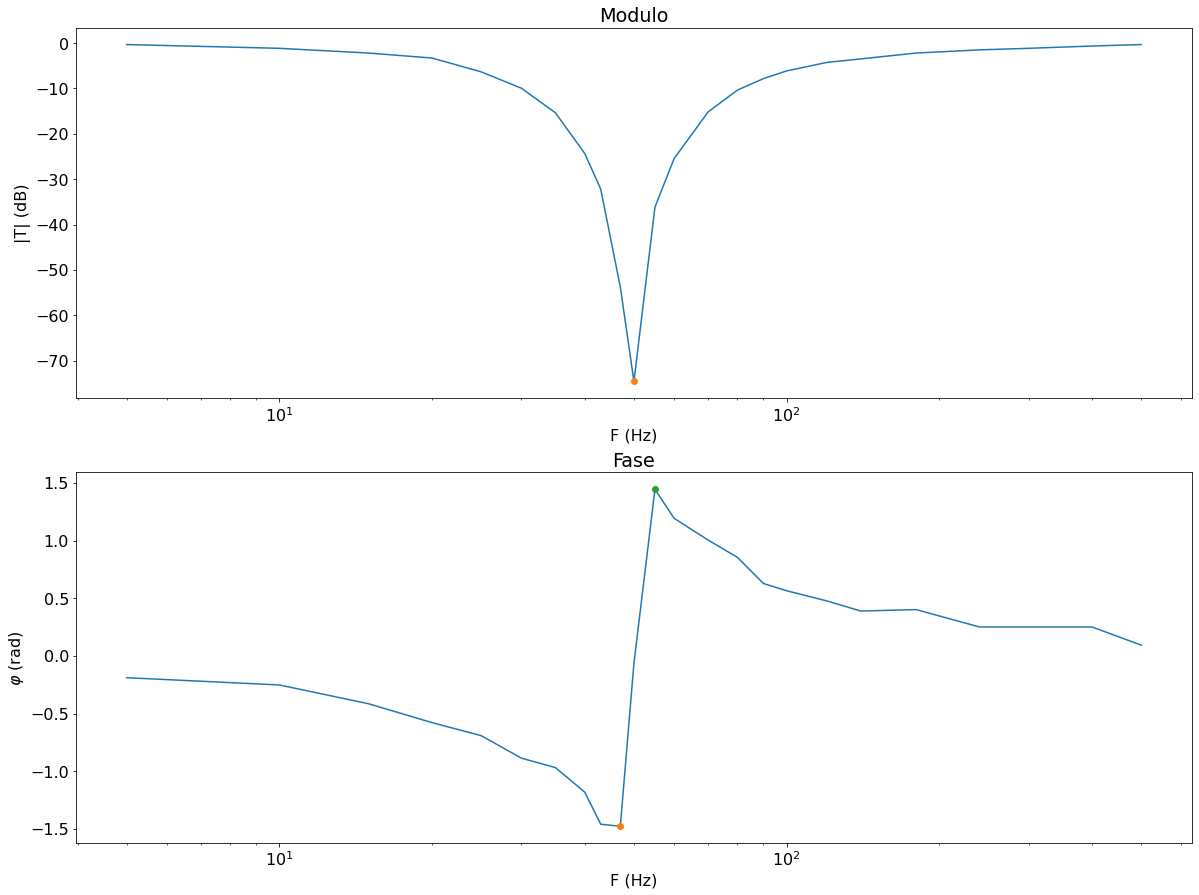

In [42]:
frec = [5, 10, 15, 20, 25, 30,35,40,43,47,50,55,60,
        70,80,90,100,120,140,180,240,300,400,500]
modulo = [0.984,0.944,0.896,0.848,0.728,0.608,0.464,0.296,0.2,0.068,0.024,0.164,
          0.28,0.468,0.596,0.676,0.736,0.808,0.84,0.896,0.928,0.944,0.968,0.984]
desfasaje = [-0.188495559,-0.251327412,-0.41469023,-0.578053048,-0.691150384,-0.885929128,-0.967610537,-1.181238838,-1.458955628,-1.476548547,-0.062831853,
             1.445132621,1.193805208,1.005309649,0.854513202,0.628318531,0.565486678,0.477522083,0.389557489,0.40212386,0.251327412,0.251327412,0.251327412,0.09424778]

plt.rcParams["figure.figsize"] = (20,15)
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(frec, 20*np.log(modulo))
ax1.set_xscale("log")
ax1.set_title('Modulo')
ax1.set_xlabel('F (Hz)')
ax1.set_ylabel('|T| (dB)')

ax1.plot(50, 20*np.log(0.024), marker = 'o')
print("Atenuación en 50Hz: %d dB", 20*np.log(0.024))

ax2.plot(frec, desfasaje)
ax2.set_xscale("log")
ax2.set_title('Fase')
ax2.set_xlabel('F (Hz)')
ax2.set_ylabel(r'$\varphi$' + ' (rad)')
ax2.plot(47, -1.476548547, 55, 1.445132621, marker = 'o')
print("Desfasaje en 47Hz: -1.476548547 rad")
print("Desfasaje en 55Hz: 1.445132621 rad")

## Mediciones hechas con analizador

![Modulo](Mediciones/Modulo_analizador.jpeg "Modulo")

Observamos que se obtuvo la mayor atenuación en 48.7 Hz, muy cercano al valor esperado. Debido a la aproximación de componentes y a la alta tolerancia usada, tampoco obtuvimos la atenuación máxima esperada.

![Fase](Mediciones/Fase_analizador.jpeg "Fase")

Al igual que en el módulo, se obtuvo el cambio de fase en aproximadamente 50Hz, pasando de $-\pi/2$ a $\pi/2$, como se espera en un filtro Notch. 